In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
us = pd.read_excel('usyield.xlsx')
us.set_index('Dates', inplace=True)
us.drop('USGG20YR', axis = 1, inplace = True)

In [3]:
usweekly = us.resample('W').last()
usweekly.head(1000)

,USGG1M,USGG3M,USGG6M,USGG12M,USGG2YR,USGG5YR,USGG10YR,USGG30YR
Dates,,,,,,,,
2013-01-06,0.0558,0.0710,0.1116,0.1421,0.2675,0.8093,1.9008,3.0989
2013-01-13,0.0458,0.0710,0.1014,0.1370,0.2529,0.7805,1.8695,3.0487
2013-01-20,0.0355,0.0761,0.1014,0.1370,0.2543,0.7613,1.8434,3.0306
2013-01-27,0.0608,0.0761,0.1116,0.1421,0.2758,0.8490,1.9505,3.1350
2013-02-03,0.0253,0.0710,0.1065,0.1370,0.2658,0.8830,2.0167,3.2187
...,...,...,...,...,...,...,...,...
2022-08-21,2.1964,2.6913,3.1266,3.2432,3.2359,3.0950,2.9776,3.2171
2022-08-28,2.3108,2.8405,3.2286,3.3692,3.4028,3.2085,3.0446,3.1954
2022-09-04,2.4506,2.9222,3.3670,3.4497,3.3955,3.2962,3.1950,3.3496


In [6]:
rolling_US = usweekly.assign(index = list(range(0,507,1)))
rolling_US.set_index('index', inplace=True)

In [7]:
rolling_US.head(510)

,USGG1M,USGG3M,USGG6M,USGG12M,USGG2YR,USGG5YR,USGG10YR,USGG30YR
index,,,,,,,,
0,0.0558,0.0710,0.1116,0.1421,0.2675,0.8093,1.9008,3.0989
1,0.0458,0.0710,0.1014,0.1370,0.2529,0.7805,1.8695,3.0487
2,0.0355,0.0761,0.1014,0.1370,0.2543,0.7613,1.8434,3.0306
3,0.0608,0.0761,0.1116,0.1421,0.2758,0.8490,1.9505,3.1350
4,0.0253,0.0710,0.1065,0.1370,0.2658,0.8830,2.0167,3.2187
...,...,...,...,...,...,...,...,...
502,2.1964,2.6913,3.1266,3.2432,3.2359,3.0950,2.9776,3.2171
503,2.3108,2.8405,3.2286,3.3692,3.4028,3.2085,3.0446,3.1954
504,2.4506,2.9222,3.3670,3.4497,3.3955,3.2962,3.1950,3.3496


In [8]:
window = 4

In [9]:
MonthlyAverageValue = pd.DataFrame(np.zeros((rolling_US.shape[0] - window + 1, rolling_US.shape[1])))

In [10]:
def rolling_pca(window_data):
    roll_pca = PCA(copy = True, n_components=3)
    
    roll_pca.fit(rolling_US.loc[window_data, :]) #generate PCs
    
    roll_vals = roll_pca.transform(rolling_US.loc[window_data, :]) #reconstruct coefficients of PCs
    
    roll_reconstruct = roll_pca.inverse_transform(roll_vals) #reconstruct each value of each yield
    
    WindowAverageValue = np.average(roll_reconstruct, axis = 0) #take average of the reconstructed values in each window
    
    MonthlyAverageValue.iloc[int(window_data.index[0])] = WindowAverageValue
    
    return True

In [11]:
df_idx = pd.DataFrame(np.arange(rolling_US.shape[0]))

In [12]:
df_idx.rolling(window).apply(rolling_pca)

,0
0,NaN
1,NaN
2,NaN
3,1.0
4,1.0
...,...
502,1.0
503,1.0
504,1.0
505,1.0


In [13]:
MonthlyAverageValue.head(1000)

,0,1,2,3,4,5,6,7
0,0.049475,0.073550,0.106500,0.139550,0.262625,0.800025,1.891050,3.078300
1,0.041850,0.073550,0.105225,0.138275,0.262200,0.818450,1.920025,3.108250
2,0.039275,0.073550,0.107775,0.140825,0.262475,0.830425,1.940575,3.137175
3,0.051950,0.079875,0.114125,0.144650,0.266425,0.855625,1.980600,3.173750
4,0.063375,0.092550,0.120475,0.148450,0.260475,0.850375,1.983875,3.178525
...,...,...,...,...,...,...,...,...
499,2.176675,2.556575,3.040525,3.191500,3.152200,2.923225,2.825175,3.104950
500,2.209100,2.663800,3.126675,3.288275,3.280275,3.055500,2.922800,3.150550
501,2.281550,2.760025,3.203075,3.334675,3.321700,3.139400,3.013475,3.219525
502,2.370600,2.878175,3.320200,3.432025,3.399225,3.259150,3.133150,3.303250


In [14]:
usweekly2 = usweekly.loc['2013-01-27':,:]

In [15]:
MonthlyAverageValue['date'] = usweekly2.index
MonthlyAverageValue.set_index('date', inplace=True)

In [16]:
combo=pd.DataFrame()

combo['1mo_raw']=usweekly2['USGG1M']
combo['1mo_re']=MonthlyAverageValue[0]
combo['1y_raw']=usweekly2['USGG12M']
combo['1y_re']=MonthlyAverageValue[3]
combo['10y_raw']=usweekly2['USGG10YR']
combo['10y_re']=MonthlyAverageValue[6]
combo['30y_raw']=usweekly2['USGG30YR']
combo['30y_re']=MonthlyAverageValue[7]

combo['date'] = usweekly2.index
combo.set_index('date', inplace=True)

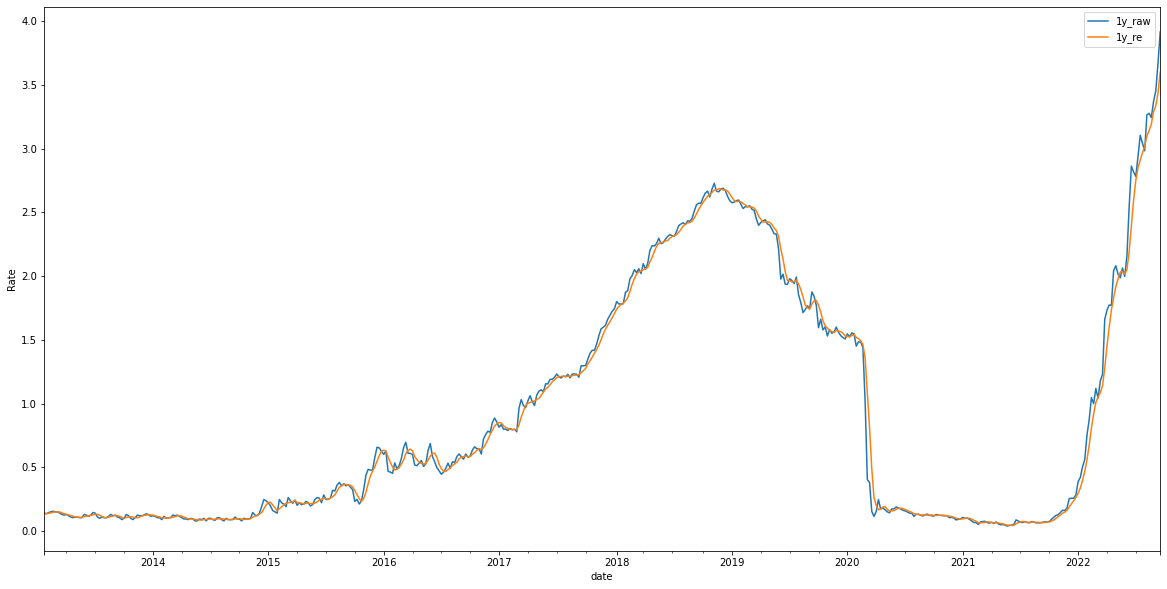

In [17]:
combo.plot(y = ['1y_raw', '1y_re'], figsize=(20,10))
plt.ylabel("Rate")
plt.show()

In [19]:
combo.to_excel(excel_writer = 'Rolling_PCA.xlsx', sheet_name = 'US')